<a href="https://colab.research.google.com/github/salemprakash/VAIAL-Handson/blob/main/CropsRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hands-on Applications of AI and Machine Learning in Soil Health: Model Building and Analysis**

* The Crop Recommendation System is an application based on machine
learning that gives the crop suggestions according to different environmental and soil conditions.
* The main objective is to help farmers and agricultural professionals make informed choices, improve crop yields, and enhance profitability.

* The system analyzes factors such as soil type, climate, rainfall, temperature, humidity, and pH levels to predict the most appropriate crops for a given region.
* The system utilizes historical data and advanced predictive models to deliver customized recommendations tailored to the specific conditions of a farm or agricultural location.



---

The dataset used in this project is built by augmenting rainfall, climate, and fertilizer data specific to India. The following attributes are included in the dataset:

* N: Nitrogen content in the soil
* P: Phosphorous content in the soil
* K: Potassium content in the soil
* Temperature: Temperature in degrees Celsius
* Humidity: Relative humidity in %
* pH: pH value of the soil
* Rainfall: Rainfall in mm


#Data Collection and Preprocessing

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/salemprakash/VAIAL-Handson/refs/heads/main/crop_data.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#sanity checkp
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
#calculating shape of columns
data.shape

(2200, 8)

In [5]:
#finding missing value
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [6]:
#finding duplicates
data.duplicated().sum()

np.int64(0)

In [7]:
#identifiying Garbage values
for i in data.select_dtypes(include = 'object').columns:
    print(data[i].value_counts())
    print("***"*10)

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64
******************************


#Exploratory Data Analysis

In [8]:
#descriptive statistics
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
#transposing the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [10]:
#descriptive statistics of object column
data.describe(include = 'object')

,label
count,2200
unique,22
top,rice
freq,100


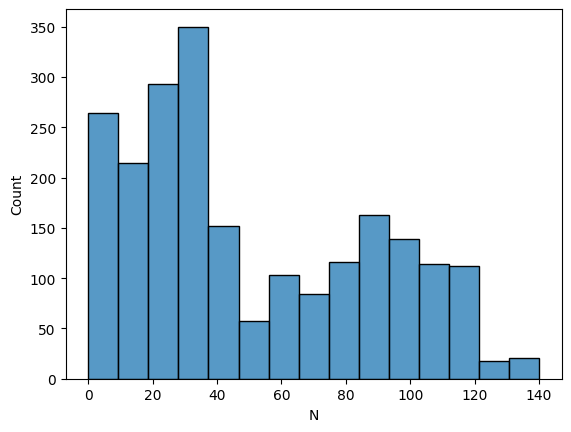

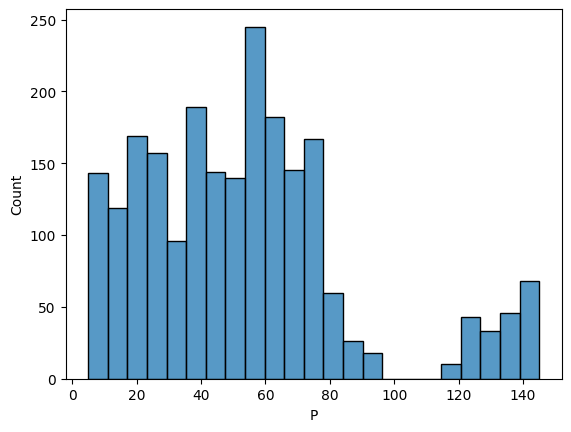

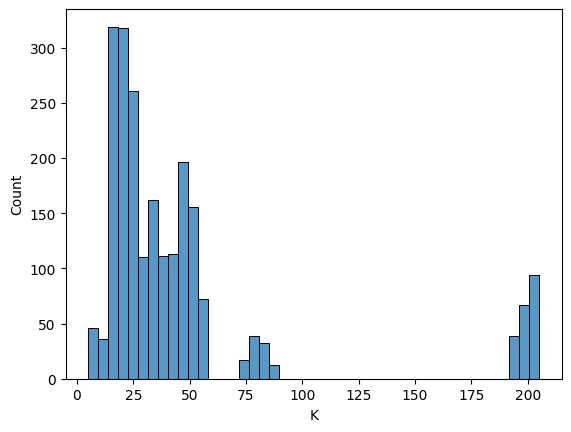

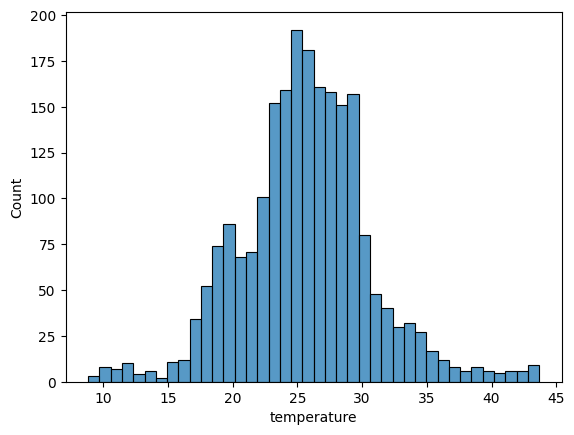

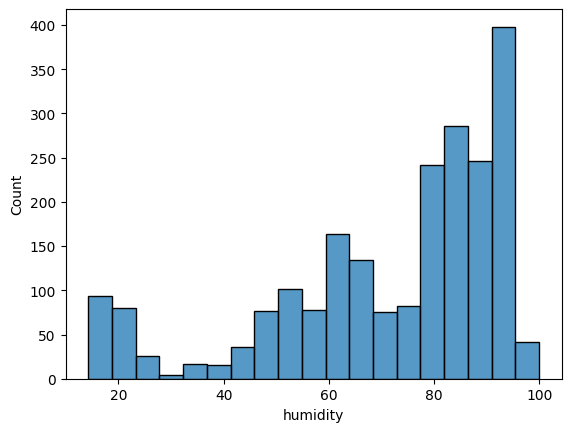

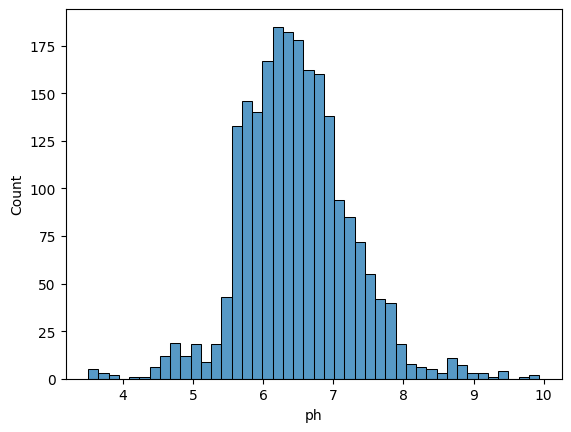

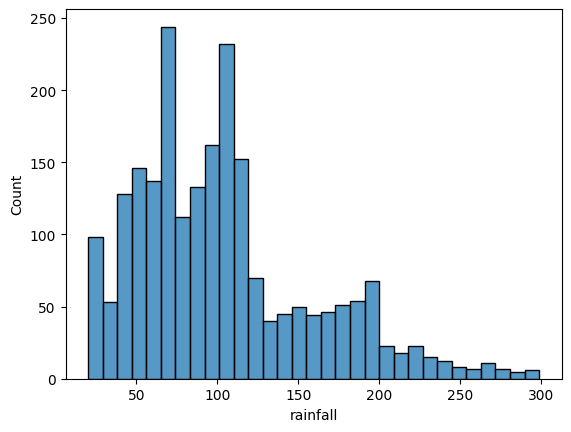

In [11]:
#histogram to understand the distribution
import seaborn as sns
from matplotlib import pyplot as plt
for i in data.select_dtypes(include = ['number']).columns:
    sns.histplot(data = data,x=i)
    plt.show()

**Calculating Z-scores to check the outliers**

Boxplot with outliers

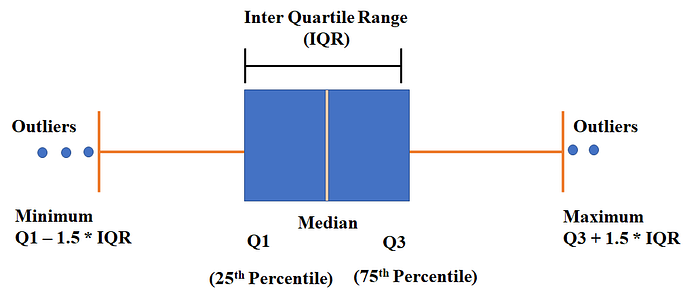


In [ ]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(data.select_dtypes(include=['number']))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
data_outliers = data[outliers]
print(data_outliers)

**function to check the quantile values for classifying outliers**

In [ ]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5 * iqr
    uw = q1 + 1.5 * iqr
    return lw,uw

In [ ]:
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    lw,uw = whisker(data[i])
    print(f'\t\t\tOutliers\n*****************************************************************************************')
    print(f'{i}-lower:{lw}\t\t{i}-upper:{uw}\n')


In [ ]:
#box plot to identify the distribution and outliers
import seaborn as sns
from matplotlib import pyplot as plt
for i in data.select_dtypes(include = ['number']).columns:
    sns.boxplot(data = data,x=i)
    plt.show()

In [ ]:
#scatter plot to understand the realationship between features and label
for i in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    sns.scatterplot(data = data,x = i,y = 'label')
    plt.show()

In [ ]:
#correlation with heatmap to interpret the relation and multicolliniarity
set1 = data.select_dtypes(include = 'number').corr()

In [ ]:
set1

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(set1,annot=True,fmt='.2f',cmap = 'coolwarm')
plt.title('correlation matrix')

In [ ]:
data.select_dtypes(include = 'number').columns

#Modelling process

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
#load the datasets
#data = data1

In [ ]:
# Selecting continuous numerical columns and the label
features = data.select_dtypes(include=[float, int]).columns
target = 'label'

In [ ]:
# Splitting dataset as features and label
X = data[features]
y = data[target]

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the dataset using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
display(X_train_scaled,X_test_scaled)

In [ ]:
# Model Initializing using Gaussian NaiveBayes algorithm
model = GaussianNB()
model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Function to predict crop using scaeled data
def predict_crop(features):
    features_df = pd.DataFrame([features], columns=features.keys())
    scaled_features = scaler.transform(features_df)
    prediction = model.predict(scaled_features)
    return prediction[0]

In [ ]:
#input features
features = {
    'N': input('enter Nitrogen value:'),
    'P': input('Enter Phosphorous values:'),
    'K': input('Enter Potassium value:'),
    'temperature': input('Enter the Temperature:'),
    'humidity': input('Enter the Humidity:'),
    'ph': input('Enter the pH value:'),
    'rainfall': input('Enter the Rainfall:')
}
print('Naive Bayes Prediction:', predict_crop(features))

#Model Evaluation

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = data

# Selecting continuous columns and the label
continuous_columns = df.select_dtypes(include=[float, int]).columns
label_column = 'label'

# Splitting features and label
X = df[continuous_columns]
y = df[label_column]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# revertng the scaled array back to DataFrame to retain feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=continuous_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=continuous_columns)

# Model initializing using Gaussian Naive Bayes algorithm
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predicting using the test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculating accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100}")
print(f"Test Accuracy: {test_accuracy*100}")

# Plot learning curves
train_sizes = np.linspace(0.1, 1.0, 10, endpoint=False)
train_scores = []
test_scores = []

for train_size in train_sizes:
    # Using only  portion of the training data
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train_scaled, y_train, train_size=train_size, random_state=42)
    model.fit(X_train_partial, y_train_partial)
    train_scores.append(model.score(X_train_partial, y_train_partial))
    test_scores.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label='Training Score')
plt.plot(train_sizes, test_scores, label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Training the model on training data
model.fit(X_train_scaled, y_train)

# Evaluating the model on training data
train_predictions = model.predict(X_train_scaled)
nb_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {nb_train_accuracy*100}')

# Evaluating the model on testing data
test_predictions = model.predict(X_test_scaled)
nb_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {nb_test_accuracy*100}')

In [ ]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation for model optimization
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores*100}')
print(f'Mean CV Score: {cv_scores.mean()*100}')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy')

# Calculating mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [ ]:


# Model Evaluation
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test,y_pred,average = 'weighted',zero_division=0)
recall = metrics.recall_score(y_test,y_pred,average = 'weighted')
f1 = metrics.f1_score(y_test,y_pred,average = 'weighted')
print(f'Model Accuracy: {accuracy * 100:.2f}%')
print(f'Precision Score: {precision * 100:.2f}%')
print(f'Recall Score: {recall * 100: .2f}%')
print(f'f1-score: {f1*100:.2f}%')



In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(f'Confusion matrix:\n{cm}')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
cr = metrics.classification_report(y_test,y_pred,zero_division=0)
print(f'Classification Report:\n{cr}')

#Insights and Recommendations

In [ ]:


#training of data and checking libraries with more accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#libraries used in dictionary format
models = {
    'Logistic Regression' : LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine' : SVC(),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Bagging' : BaggingClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

#name = libraries/modulesnames, md = models dictionary and results will be assigned in items
for name,md in models.items():
    md.fit(X_train_scaled,y_train)
    ypred = md.predict(X_test_scaled)

    print(f"{name} with accuracy : {accuracy_score(y_test,ypred) * 100}")

